# Scaling and Normalization

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.cluster.vq import whiten

Terminology (from [this post](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)):
    
* Scale generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.
* Standardize generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. Scaling is often implied.
* Normalize can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

via [Machine Learning Mastery](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/):

* If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.

In [18]:
house_prices = pd.read_csv("data/house-prices.csv")
house_prices["AgeWhenSold"] = house_prices["YrSold"] - house_prices["YearBuilt"]
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


## Unscaled Housing Prices Age When Sold

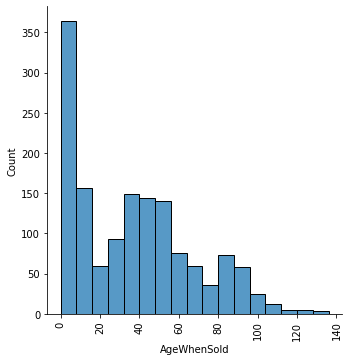

In [19]:
sns.displot(house_prices["AgeWhenSold"])
plt.xticks(rotation=90)
plt.show()

## StandardScaler

Note that DataFrame.var and DataFrame.std default to using 1 degree of freedom (ddof=1) but StandardScaler is using numpy's versions which default to ddof=0. That's why when printing the variance and standard deviation of the original data frame, we're specifying ddof=0. ddof=1 is known as Bessel's correction.

In [3]:
df = pd.DataFrame({
    'col1': [1, 2, 3],
    'col2': [10, 20, 30],
    'col3': [0, 20, 22]
})
print("Original:\n")
print(df)
print("\nColumn means:\n")
print(df.mean())
print("\nOriginal variance:\n")
print(df.var(ddof=0))
print("\nOriginal standard deviations:\n")
print(df.std(ddof=0))

scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("\nAfter scaling:\n")
print(df1)
print("\nColumn means:\n")
print(round(df1.mean(), 3))
print("\nVariance:\n")
print(df1.var(ddof=0))
print("\nStandard deviations:\n")
print(df1.std(ddof=0))

print("\nExample calculation for col2:")
print("z = (x - mean) / std")
print("z = (10 - 20) / 8.164966 = -1.224745")

Original:

   col1  col2  col3
0     1    10     0
1     2    20    20
2     3    30    22

Column means:

col1     2.0
col2    20.0
col3    14.0
dtype: float64

Original variance:

col1     0.666667
col2    66.666667
col3    98.666667
dtype: float64

Original standard deviations:

col1    0.816497
col2    8.164966
col3    9.933110
dtype: float64

After scaling:

       col1      col2      col3
0 -1.224745 -1.224745 -1.409428
1  0.000000  0.000000  0.604040
2  1.224745  1.224745  0.805387

Column means:

col1    0.0
col2    0.0
col3    0.0
dtype: float64

Variance:

col1    1.0
col2    1.0
col3    1.0
dtype: float64

Standard deviations:

col1    1.0
col2    1.0
col3    1.0
dtype: float64

Example calculation for col2:
z = (x - mean) / std
z = (10 - 20) / 8.164966 = -1.224745


### Standard Scaler with Age When Sold

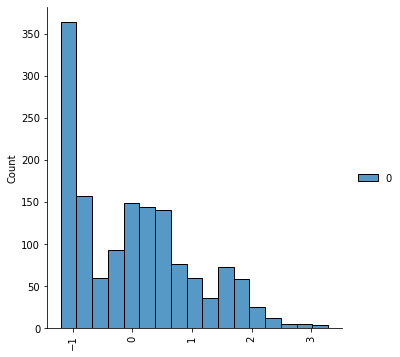

In [25]:
scaler = StandardScaler()
age_when_sold_scaled = scaler.fit_transform(house_prices["AgeWhenSold"].values.reshape(-1, 1))
sns.displot(age_when_sold_scaled)
plt.xticks(rotation=90)
plt.show()

## Whiten

```
x_new = x / std(x)
```

In [15]:
data = [5, 1, 3, 3, 2, 3, 8, 1, 2, 2, 3, 5]
print("Original:", data)
print("\nStd Dev:", np.std(data))

scaled = whiten(data)
print("\nScaled with Whiten:", scaled)

scaled_manual = data / np.std(data)
print("\nScaled Manuallly:", scaled_manual)

Original: [5, 1, 3, 3, 2, 3, 8, 1, 2, 2, 3, 5]

Std Dev: 1.9075871903765997

Scaled with Whiten: [2.62111217 0.52422243 1.5726673  1.5726673  1.04844487 1.5726673
 4.19377947 0.52422243 1.04844487 1.04844487 1.5726673  2.62111217]

Scaled Manuallly: [2.62111217 0.52422243 1.5726673  1.5726673  1.04844487 1.5726673
 4.19377947 0.52422243 1.04844487 1.04844487 1.5726673  2.62111217]


## MinMax

Scales to a value between 0 and 1.

More suspectible to influence by outliers.

### Housing Prices Age When Sold

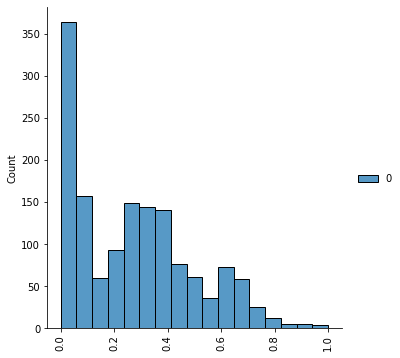

In [27]:
scaler = MinMaxScaler()
age_when_sold_scaled = scaler.fit_transform(house_prices["AgeWhenSold"].values.reshape(-1, 1))
sns.displot(age_when_sold_scaled)
plt.xticks(rotation=90)
plt.show()

## Robust Scaler

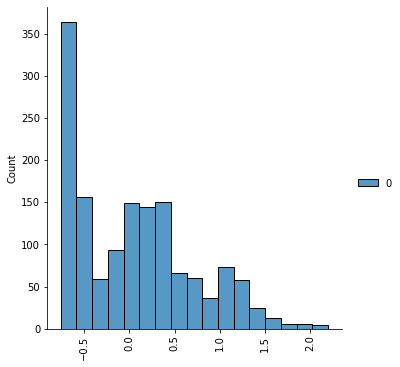

In [30]:
scaler = RobustScaler()
age_when_sold_scaled = scaler.fit_transform(house_prices["AgeWhenSold"].values.reshape(-1, 1))
sns.displot(age_when_sold_scaled)
plt.xticks(rotation=90)
plt.show()